# TP Challenge

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [1]:
#import the librairies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing data

In [2]:
#import datas
data_test = pd.read_csv('./data/test.csv')
data_train = pd.read_csv('./data/train.csv')

In [3]:
#total test data
print(data_test.shape[0])

1715


In [4]:
#total train data
print(data_train.shape[0])

4107


In [5]:
#total data
print(data_test.shape[0] + data_train.shape[0])

5822


## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [6]:
#Data Train: check missing values
data_test_missing = data_test.isnull().any()

if data_test_missing.any():
    print("Data Train: Missing values found in the file.")
else:
    print("Data Train: No missing values in the file.")

Data Train: No missing values in the file.


In [7]:
#Data Train: check and delete duplicated rows
data_train_duplicated = data_train.duplicated()

if data_train_duplicated.any():
    data_train = train_test.drop_duplicates()
    print("Data Train: Duplicated rows have been deleted.")
else:
    print("Data Train: No duplicated rows in the file.")

Data Train: No duplicated rows in the file.


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


In [8]:
#Exclude columns
features_train = data_train.drop(['Id', 'Buy'], axis=1)

<Axes: >

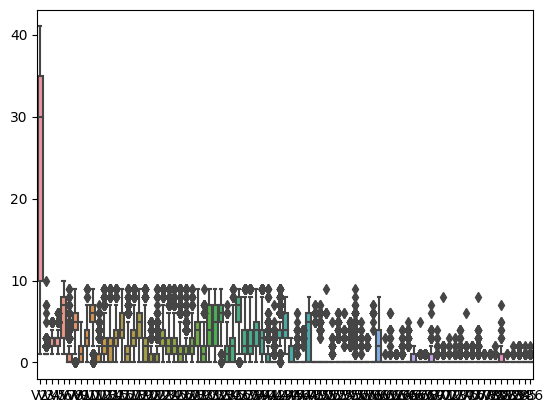

In [9]:
#Outliers
sns.boxplot(data=features_train)

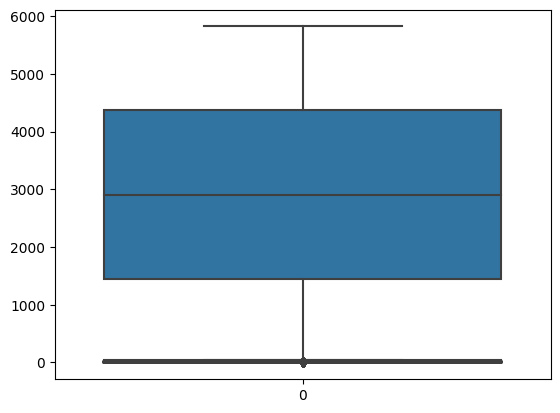

In [10]:
for column in data_train.columns:
    sns.boxplot(data=data_train[column])

<Axes: >

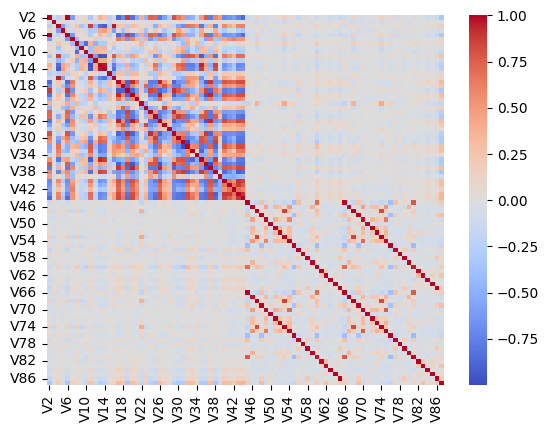

In [11]:
#Correlation Heatmap
analyze = data_train.columns.drop(['Id'])
matrix = data_train[analyze].corr()

corr_matrix = matrix.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

<Axes: xlabel='Buy', ylabel='count'>

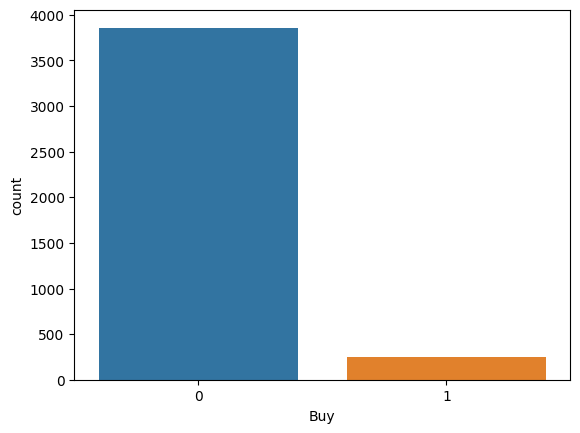

In [12]:
sns.countplot(data=data_train, x='Buy')

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

features_train = data_train.drop(['Id', 'Buy'], axis=1)
target_train = data_train['Buy']

rus = RandomUnderSampler()
undersampled_features, undersampled_target = rus.fit_resample(features_train, target_train)

print("Undersample data:", Counter(undersampled_target))

Undersample data: Counter({0: 248, 1: 248})


## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


In [15]:
#import
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, learning_curve


In [16]:
#data split
X_train, X_validation, y_train, y_validation = train_test_split(undersampled_features, undersampled_target, test_size=0.2, random_state=42)

### Dummy model

In [17]:
dummy_model = DummyClassifier()
dummy_model.fit(X_train, y_train)

dummy_predictions = dummy_model.predict(X_validation)

accuracy = accuracy_score(y_validation, dummy_predictions)
print("Dummy Model Accuracy:", accuracy * 100)

Dummy Model Accuracy: 50.0


In [18]:
confusion = confusion_matrix(y_validation, dummy_predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[50  0]
 [50  0]]


### Better model

In [19]:
#Logistic regression model
better_model = LogisticRegression(max_iter=2000)
better_model.fit(X_train, y_train)
better_predictions = better_model.predict(X_validation)

#Accuracy score
accuracy = accuracy_score(y_validation, better_predictions)
print("Logistic Regression Accuracy:", accuracy * 100)

Logistic Regression Accuracy: 63.0


In [20]:
#Confusion matrix
matrix = confusion_matrix(y_validation, better_predictions)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[31 19]
 [18 32]]


### Accuracy, Recall, Precision, Score

In [21]:
#Accuracy
print("Accuracy:", accuracy_score(y_validation, better_predictions) * 100)

#Recall
print("Recall:", recall_score(y_validation, better_predictions) * 100)

#Precision
print("Precision:", precision_score(y_validation, better_predictions) * 100)

#score
print("F1 Score:", f1_score(y_validation, better_predictions) * 100)

Accuracy: 63.0
Recall: 64.0
Precision: 62.745098039215684
F1 Score: 63.36633663366336


### Learning curve

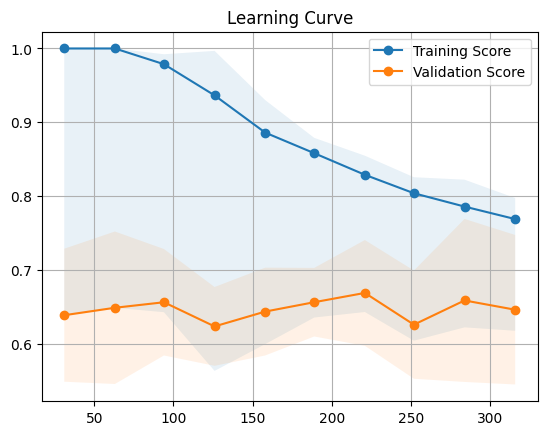

In [22]:
train_sizes, train_scores, validation_scores = learning_curve(better_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', label='Validation Score')
plt.fill_between(train_sizes, validation_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1)
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.